# NETFLIX DATA ANALYSIS

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df= pd.read_csv('mymoviedb.csv', lineterminator='\n')

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r
0,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,01-03-2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,25-02-2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,24-11-2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,22-12-2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
        9837 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [6]:
df['Genre'].head()

,Genre
0,"Action, Adventure, Science Fiction"
1,"Crime, Mystery, Thriller"
2,Thriller
3,"Animation, Comedy, Family, Fantasy"
4,"Action, Adventure, Thriller, War"


In [7]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe()

,Popularity
count,9827.000000
mean,40.320570
std,108.874308
min,7.100000
25%,16.127500
50%,21.191000
75%,35.174500
max,5083.954000


In [ ]:
# Exploration Summary

# We have a dataframe consisting of 9837 rows and 9 columns.
# Our dataset looks a bit tidy with no NaNs nor duplicate values.
# Release_Date column needs to be casted into date time and to extract only the year value
# Overview, Original_Language and Poster-Url wouldn't be so useful during data analysis, so we'll drop them.
# There is noticable outliers in Popularity column
# Vote_Average better be categorized for poor analysis.

In [13]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

print(df['Release_Date'].head())

0   2021-12-15
1   2022-03-01
2   2022-02-25
3   2021-11-24
4   2021-12-22
Name: Release_Date, dtype: datetime64[ns]


In [18]:
df['Release_Date'] = df['Release_Date'].astype('Int64')
df['Release_Date'].dtypes


Int64Dtype()

In [19]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [42]:
# Dropping the columns

cols = ['overview','original_language', 'poster_url' ]

In [43]:
df.columns = df.columns.str.strip().str.lower()

In [44]:
df.drop(
    columns=['overview', 'original_language', 'poster_url'],
    inplace=True,
    errors='ignore'
)

In [45]:
df.columns

Index(['release_date', 'title', 'popularity', 'vote_count', 'vote_average',
       'genre', 'vote_avg_category'],
      dtype='object')

In [46]:
df.head()

,release_date,title,popularity,vote_count,vote_average,genre,vote_avg_category
0,15-12-2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action,popular
1,15-12-2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure,popular
2,15-12-2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction,popular
3,01-03-2022,The Batman,3827.658,1151,8.1,Crime,popular
4,01-03-2022,The Batman,3827.658,1151,8.1,Mystery,popular


categorizing Vote_Average column

We would cut the Vote_Average values and make 4 categories: popular, average, below_avg, not_popular to describe it more using categorize_col() function provided above.

In [25]:
def categorize_col(df, col, new_col, labels):
    desc = df[col].describe()

    edges = [
        desc['min'],
        desc['25%'],
        desc['50%'],
        desc['75%'],
        desc['max']
    ]

    df[new_col] = pd.cut(
        df[col],
        bins=edges,
        labels=labels,
        include_lowest=True
    )

    return df


In [26]:
labels = ['not_popular', 'below_avg', 'average', 'popular']

df = categorize_col(df, 'vote_average', 'vote_avg_category', labels)

df['vote_avg_category'].unique()

['popular', 'below_avg', 'average', 'not_popular']
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [47]:
df.head()

,release_date,title,popularity,vote_count,vote_average,genre,vote_avg_category
0,15-12-2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action,popular
1,15-12-2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure,popular
2,15-12-2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction,popular
3,01-03-2022,The Batman,3827.658,1151,8.1,Crime,popular
4,01-03-2022,The Batman,3827.658,1151,8.1,Mystery,popular


In [48]:
df['vote_avg_category'].value_counts()

,count
vote_avg_category,
average,6612
popular,6520
below_avg,6348
not_popular,6312


In [49]:
df.dropna(inplace=True)

df.isna().sum()

,0
release_date,0
title,0
popularity,0
vote_count,0
vote_average,0
genre,0
vote_avg_category,0


# We will split genres into a list and then explode our dataframe to have only one genre per row for each movie

In [50]:
df.columns

Index(['release_date', 'title', 'popularity', 'vote_count', 'vote_average',
       'genre', 'vote_avg_category'],
      dtype='object')

In [51]:
df['genre'] = df['genre'].str.split(',')
df = df.explode('genre').reset_index(drop=True)
df.head()

,release_date,title,popularity,vote_count,vote_average,genre,vote_avg_category
0,15-12-2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action,popular
1,15-12-2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure,popular
2,15-12-2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction,popular
3,01-03-2022,The Batman,3827.658,1151,8.1,Crime,popular
4,01-03-2022,The Batman,3827.658,1151,8.1,Mystery,popular


In [52]:
#casting column into category

df['genre'] = df['genre'].astype('category')

df['genre'].dtypes

CategoricalDtype(categories=[' Action', ' Adventure', ' Animation', ' Comedy', ' Crime',
                  ' Documentary', ' Drama', ' Family', ' Fantasy', ' History',
                  ' Horror', ' Music', ' Mystery', ' Romance',
                  ' Science Fiction', ' TV Movie', ' Thriller', ' War',
                  ' Western', 'Action', 'Adventure', 'Animation', 'Comedy',
                  'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
                  'History', 'Horror', 'Music', 'Mystery', 'Romance',
                  'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25792 entries, 0 to 25791
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   release_date       25792 non-null  object  
 1   title              25792 non-null  object  
 2   popularity         25792 non-null  float64 
 3   vote_count         25792 non-null  object  
 4   vote_average       25792 non-null  float64 
 5   genre              25792 non-null  category
 6   vote_avg_category  25792 non-null  category
dtypes: category(2), float64(2), object(3)
memory usage: 1.0+ MB


In [54]:
df.nunique()

,0
release_date,5892
title,9512
popularity,8159
vote_count,3266
vote_average,74
genre,38
vote_avg_category,4


In [55]:
df.head()

,release_date,title,popularity,vote_count,vote_average,genre,vote_avg_category
0,15-12-2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action,popular
1,15-12-2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure,popular
2,15-12-2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction,popular
3,01-03-2022,The Batman,3827.658,1151,8.1,Crime,popular
4,01-03-2022,The Batman,3827.658,1151,8.1,Mystery,popular


# Data Visualization

In [56]:
sns.set_style('whitegrid')

# What is the most frequent genre of movies released on Netflix?

In [57]:
df['genre'].describe()

,genre
count,25792
unique,38
top,Thriller
freq,1973


In [61]:
df['genre'] = df['genre'].str.strip()

In [62]:
df['genre'] = df['genre'].str.title()

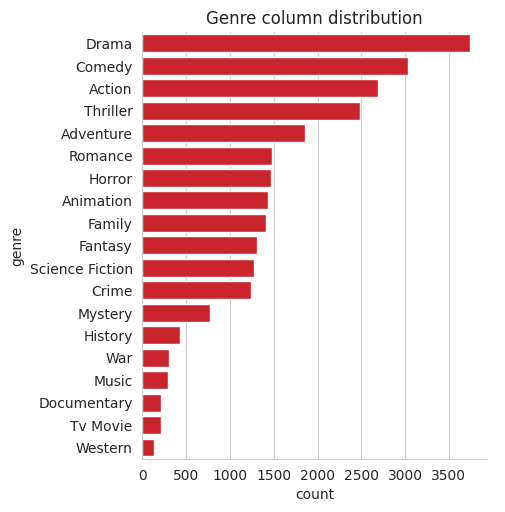

In [74]:
sns.catplot(
    y='genre',
    data=df,
    kind='count',
    order=df['genre'].value_counts().index,
    color='#E50914'
)

plt.title("Genre column distribution")
plt.show()

In [64]:
df.head()

,release_date,title,popularity,vote_count,vote_average,genre,vote_avg_category
0,15-12-2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action,popular
1,15-12-2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure,popular
2,15-12-2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction,popular
3,01-03-2022,The Batman,3827.658,1151,8.1,Crime,popular
4,01-03-2022,The Batman,3827.658,1151,8.1,Mystery,popular


# Highest votes in vote avg column?

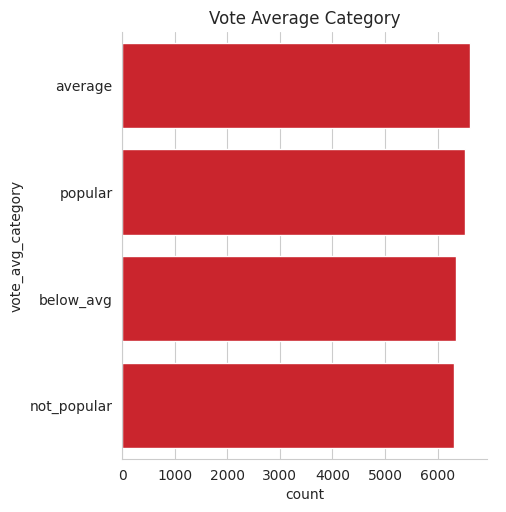

In [71]:
sns.catplot(y = 'vote_avg_category', kind = 'count', data = df, order = df['vote_avg_category'].value_counts().index, color = '#E50914')
plt.title("Vote Average Category")
plt.show()

# Movie that got the highest popularity and it's genre

In [66]:
df[df['popularity'] == df['popularity'].max()]

,release_date,title,popularity,vote_count,vote_average,genre,vote_avg_category
0,15-12-2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action,popular
1,15-12-2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure,popular
2,15-12-2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction,popular


# Movie that got lowest popularity and it's genre

In [67]:
df[df['popularity'] == df['popularity'].min()]

,release_date,title,popularity,vote_count,vote_average,genre,vote_avg_category
25786,31-03-2021,The United States vs. Billie Holiday,13.354,152,6.7,Music,average
25787,31-03-2021,The United States vs. Billie Holiday,13.354,152,6.7,Drama,average
25788,31-03-2021,The United States vs. Billie Holiday,13.354,152,6.7,History,average
25789,23-09-1984,Threads,13.354,186,7.8,War,popular
25790,23-09-1984,Threads,13.354,186,7.8,Drama,popular
25791,23-09-1984,Threads,13.354,186,7.8,Science Fiction,popular


# Year with most filmmed movies

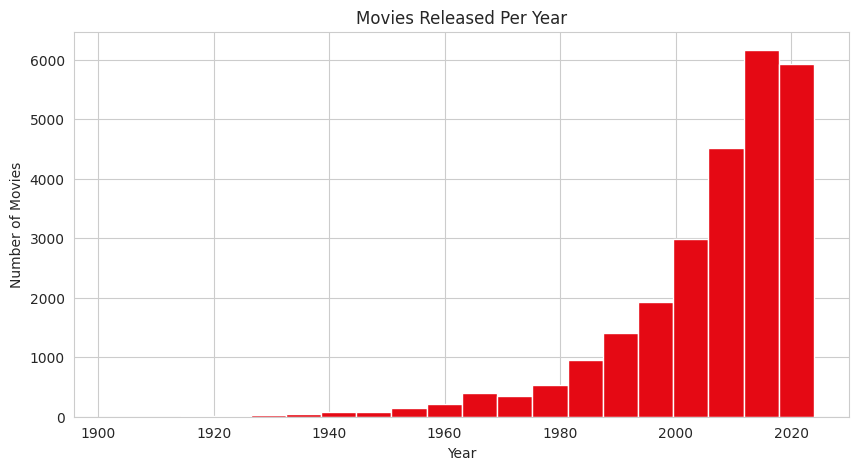

In [72]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year
plt.figure(figsize=(10, 5))
df['release_year'].hist(bins=20, color='#E50914')
plt.title('Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

# Conclusion

Q1: What is the most frequent genre in the dataset?

Drama genre is the most frequent genre in our dataset and has appeared more than
14% of the times among 19 other genres.

Q2: What genres has highest votes ?

We have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the
highest popularity among fans by being having more than 18.5% of movies popularities.

Q3: What movie got the highest popularity ? what's its genre ?

Spider-Man: No Way Home has the highest popularity rate in our dataset and it has
genres of Action , Adventure and Sience Fiction .

Q4: What movie got the lowest popularity ? what's its genre ?
The united states, thread' has the highest lowest rate in our dataset
and it has genres of music , drama , 'war', 'sci-fi' and history`.

Q5: Which year has the most filmmed movies?

year 2020 has the highest filmming rate in our dataset.
